<a href="https://colab.research.google.com/github/darshan449/Deepcept-Skill/blob/main/Fashion_MNIST_With_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification on the Fashion-MNIST dataset using a basic Convolutional Neural Network (CNN) implemented in Tensorflow Keras.**

---



This project aims to develop a convolutional neural network (CNN) model for classifying fashion items in the Fashion-MNIST dataset.

It involves data exploration, preprocessing, model training, and evaluation. The CNN architecture includes convolutional and pooling layers followed by fully connected layers, trained using the Adam optimizer with sparse categorical cross-entropy loss.

The trained model's performance is assessed through accuracy metrics and
visualized by comparing predicted labels with ground truth labels for a sample of test images.





### Basically to build any deep learning model these below steps are followed:

1. importing setups
2. Data selection
3. Data Visualization
4. Data Splitting ( for example [training data:testing data] : 80:20 or 70:30)
5. Model initializing and training
6. Model inference or validation




# **Setup Section:**

The below code imports TensorFlow, NumPy, Matplotlib, and Pandas libraries.

* **TensorFlow** is an open-source machine learning framework developed by Google for building and training neural networks.

* **NumPy** is a powerful Python library for numerical computing, providing support for arrays, matrices, and mathematical functions.

* **Matplotlib** is a comprehensive plotting library for Python, enabling creation of high-quality static, animated, and interactive visualizations.

* **Pandas** is a Python library for data manipulation and analysis, providing data structures and functions to work with structured data effectively.

* **Seaborn** is a Python data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
It simplifies the process of creating complex visualizations and offers additional features such as built-in themes and color palettes.

* **sklearn.metrics** is a module within scikit-learn, a popular machine learning library in Python. It provides various functions for evaluating model performance and computing metrics such as accuracy, precision, recall, and F1-score.

It specifically imports layers from TensorFlow's Keras API for building neural networks.

* **Tensorflow.keras.layers** is a module in TensorFlow that provides a collection of neural network layers for building deep learning models.

These layers include Dense, Conv2D, MaxPooling2D, Dropout, and Flatten, commonly used in various neural network architectures for tasks like image classification.

* The **dense layer** in TensorFlow's Keras API implements a fully connected layer where each neuron receives input from every neuron in the previous layer.

* **Conv2D** is a 2D convolutional layer used for spatial convolution over images in TensorFlow's Keras API.

* **MaxPooling2D** in tensorflow.keras.layers is a pooling layer that downsamples input by taking the maximum value in each window of specified size over each channel of the input tensor.

* **Dropout** in TensorFlow's Keras layer randomly sets a fraction of input units to zero during training to prevent overfitting.

* **Flatten** in tensorflow.keras.layers reshapes input into a one-dimensional array without altering its batch size.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# **Data Download and Exploration Section:**

This code loads the Fashion-MNIST dataset, consisting of pre-shuffled training and test data, using TensorFlow's Keras API.

The dataset used here is MNIST, which is loaded from TensorFlow's Keras dataset.

It then prints the shape of the training data and the number of samples in both the training and test sets. Additionally, it defines a list of text labels corresponding to the different clothing categories represented in the dataset, allowing for human-readable interpretation of the model's predictions.

In [ ]:
# Load the Fashion-MNIST pre-shuffled train data and test data
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

# Print training set shape
print("xtrain shape:", xtrain.shape, "ytrain shape:", ytrain.shape)

# Print the number of training and test datasets
print(xtrain.shape[0], 'train set')
print(xtest.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 1s 0us/step
xtrain shape: (60000, 28, 28) ytrain shape: (60000,)
60000 train set
10000 test set


# **Data Visualization Section:**



The code generates a grid of sample images for each class in the training set.

For each of the ten fashion item categories, it randomly selects an image from that class.

The images are then displayed with their corresponding labels as titles, organized in a 2x5 grid without axis ticks.

**Note : The data present will be in this form where black intensity is high, Then it is convert the images (data) in the dataset into a color (RGB) format to enhance the output quality.**

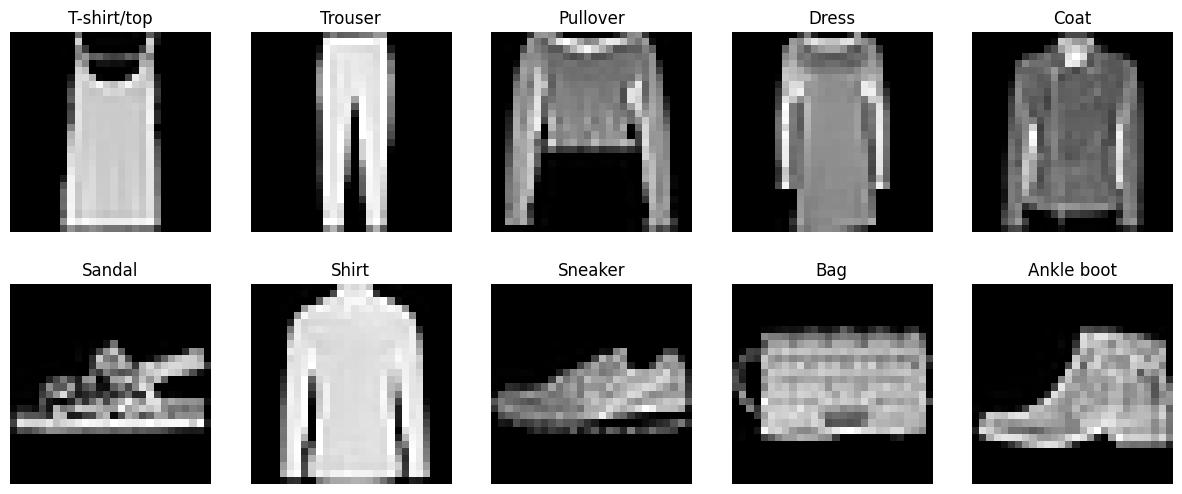

In [ ]:
# Show sample images for each class
plt.figure(figsize=(15, 6))
for i in range(10):
    class_indices = np.where(ytrain == i)[0]
    random_index = np.random.choice(class_indices)
    plt.subplot(2, 5, i+1)
    plt.imshow(xtrain[random_index], cmap="gray")
    plt.title(fashion_mnist_labels[i])
    plt.axis('off')
plt.show()

The code selects a specific image from the training dataset by index and retrieves its corresponding label from the training labels array.

It then prints the label along with its associated text description using the predefined fashion_mnist_labels list.

Finally, it displays the selected image using Matplotlib's imshow function.

This allows for visual inspection of the image associated with the chosen index to better understand the dataset and its labeling.

y = 8 Bag


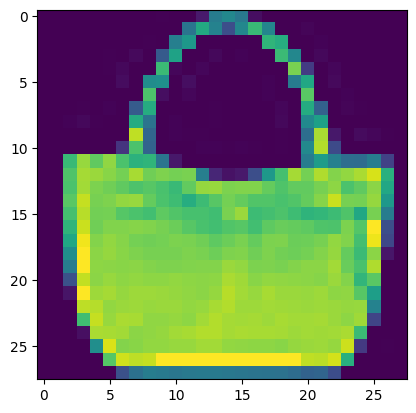

In [ ]:
# Image index, you can pick any number between 0 and 59,999
img_index = 100

# y_train contains the lables, ranging from 0 to 9
label_index = ytrain[img_index]

# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# Show one of the images from the training dataset
plt.imshow(xtrain[img_index])

The code creates a bar plot illustrating the distribution of labels in the training set.

It calculates the count of each label using Pandas' value_counts() function, ensuring the labels are sorted by index.

The plot is then customized with a title, labels for x and y axes, and appropriate tick marks representing the fashion item categories.

Finally, the plot is displayed with a color palette chosen from the 'viridis' colormap.

<ipython-input-5-5cf1f9ec838a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=pd.Series(ytrain).value_counts().sort_index(), palette='viridis')


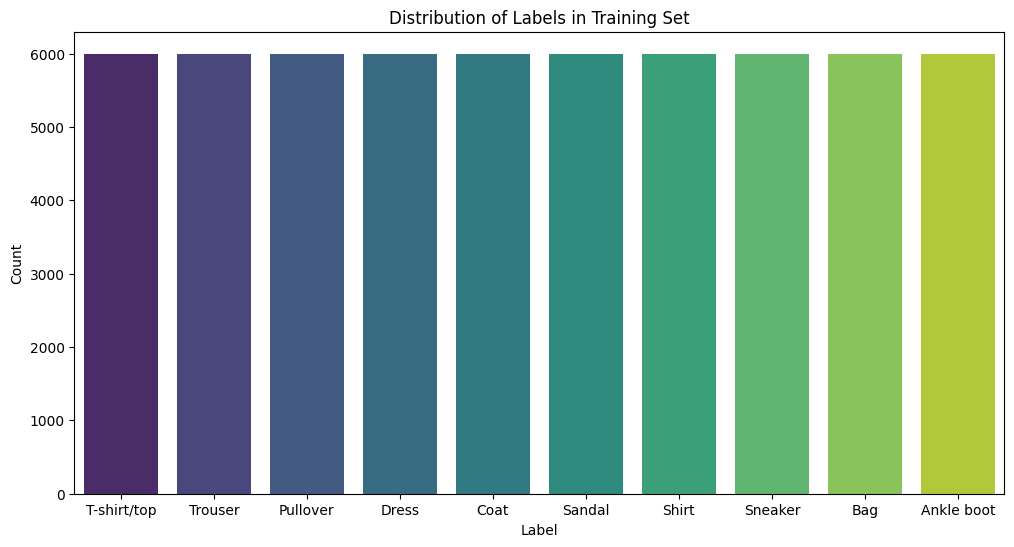

In [ ]:
# Bar plot of the distribution of labels in the training set
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(10), y=pd.Series(ytrain).value_counts().sort_index(), palette='viridis')
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=fashion_mnist_labels)
plt.show()

# **Data Split Section:**

The code defines the width and height variables to represent the dimensions of the images in the dataset, which are both set to 28 pixels.

It then reshapes the training and test data arrays to have an additional dimension of 1, indicating that the images are grayscale.

This reshaping prepares the data to be compatible with convolutional neural network (CNN) architectures, which typically expect input data in a specific format, including the width, height, and number of color channels.

In [ ]:
# Define the width and height dimensions for the images
w, h = 28, 28

# Reshape the training data to include the grayscale channel
xtrain = xtrain.reshape(xtrain.shape[0], w, h, 1)

# Reshape the test data to include the grayscale channel
xtest = xtest.reshape(xtest.shape[0], w, h, 1)

This code initializes a figure for plotting training and validation curves, specifying a size of 12x6 inches


In [ ]:
# Visualize training and validation curves (loss and accuracy)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# **Model Initialization Section:**

The code sets constants for the batch size and number of epochs, then initializes a sequential model using TensorFlow's Keras API.

It constructs a CNN with two convolutional layers, each followed by max-pooling and dropout regularization.

The flattened data is passed through two dense layers with ReLU activation and dropout.

The model is compiled with Adam optimizer and sparse categorical cross-entropy loss.

In [ ]:
# Define constants for batch size and number of epochs
BATCH_SIZE = 1000
EPOCHS = 20

In [ ]:
# Initialize a sequential model
model = tf.keras.Sequential()

# Add the first convolutional layer with 64 filters, kernel size 2x2, 'same' padding, and ReLU activation
# followed by max-pooling and dropout regularization
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Add the second convolutional layer with 32 filters, kernel size 2x2, 'same' padding, and ReLU activation
# followed by max-pooling and dropout regularization
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Flatten the data and add two dense layers with ReLU activation and dropout regularization
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation for classification

The **model.summary()** function provides a textual summary of the neural network model.

It displays a concise overview of the model architecture, including the type of layers used, the output shape of each layer, and the number of trainable parameters in the model.

For each layer, the summary typically includes:

* **Layer type**: Indicates the type of layer, such as Dense (fully connected), Conv2D (2D convolutional), etc.
Output shape: Specifies the shape of the output tensor produced by the layer.
* **Number of parameters**: Shows the total number of trainable parameters in the layer, including weights and biases.

The **model.compile**  configures the model for training by specifying the loss function, optimizer, and metrics to be used during the training process. These choices are crucial as they directly impact the model's learning process and performance.

* **loss=sparse_categorical_crossentropy**: This parameter specifies the loss function to use during model training. In this case, 'sparse_categorical_crossentropy' is chosen. This loss function is commonly used for multi-class classification tasks where the labels are integers. It calculates the cross-entropy loss between the true labels and the predicted probabilities.

* **optimizer=adam**: This parameter specifies the optimization algorithm to use during training. 'Adam' is a popular optimizer that adapts the learning rate during training and combines the advantages of two other extensions of stochastic gradient descent, namely Adagrad and RMSprop. It is efficient for training deep neural networks and often converges faster compared to traditional stochastic gradient descent.

* **metrics=['accuracy']**: This parameter specifies the metrics to monitor during training and evaluation. 'Accuracy' is a common metric used to evaluate classification models. It measures the proportion of correctly classified samples over the total number of samples. During training, the model will compute and display the accuracy metric to assess its performance on the training data. Additionally, it will be used for evaluation on the validation data if provided.


In [ ]:
model.summary()

# Compile the model with Adam optimizer and sparse categorical cross-entropy loss
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

* **Conv2D** is a type of neural network layer used in deep learning for image processing, applying a convolution operation to input data to extract features.

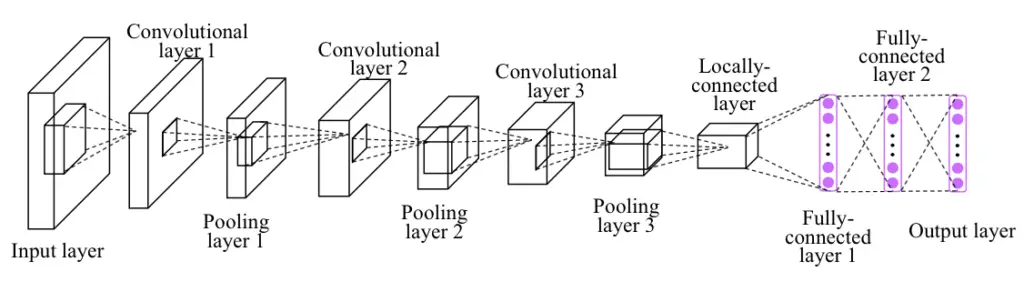


* **Maxpooling2D** is a technique in convolutional neural networks used for reducing spatial dimensions. It operates by sliding a window over the input and taking the maximum value within each window. This downsampling helps in extracting dominant features while reducing computation and avoiding overfitting.

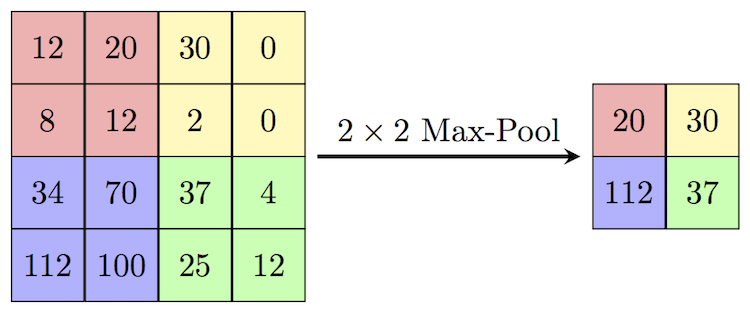

* **Dropout** is a regularization technique used in neural networks to prevent overfitting. During training, it randomly drops a fraction of neurons from the network, forcing the model to learn more robust features. This helps in improving generalization performance by reducing reliance on specific neurons.

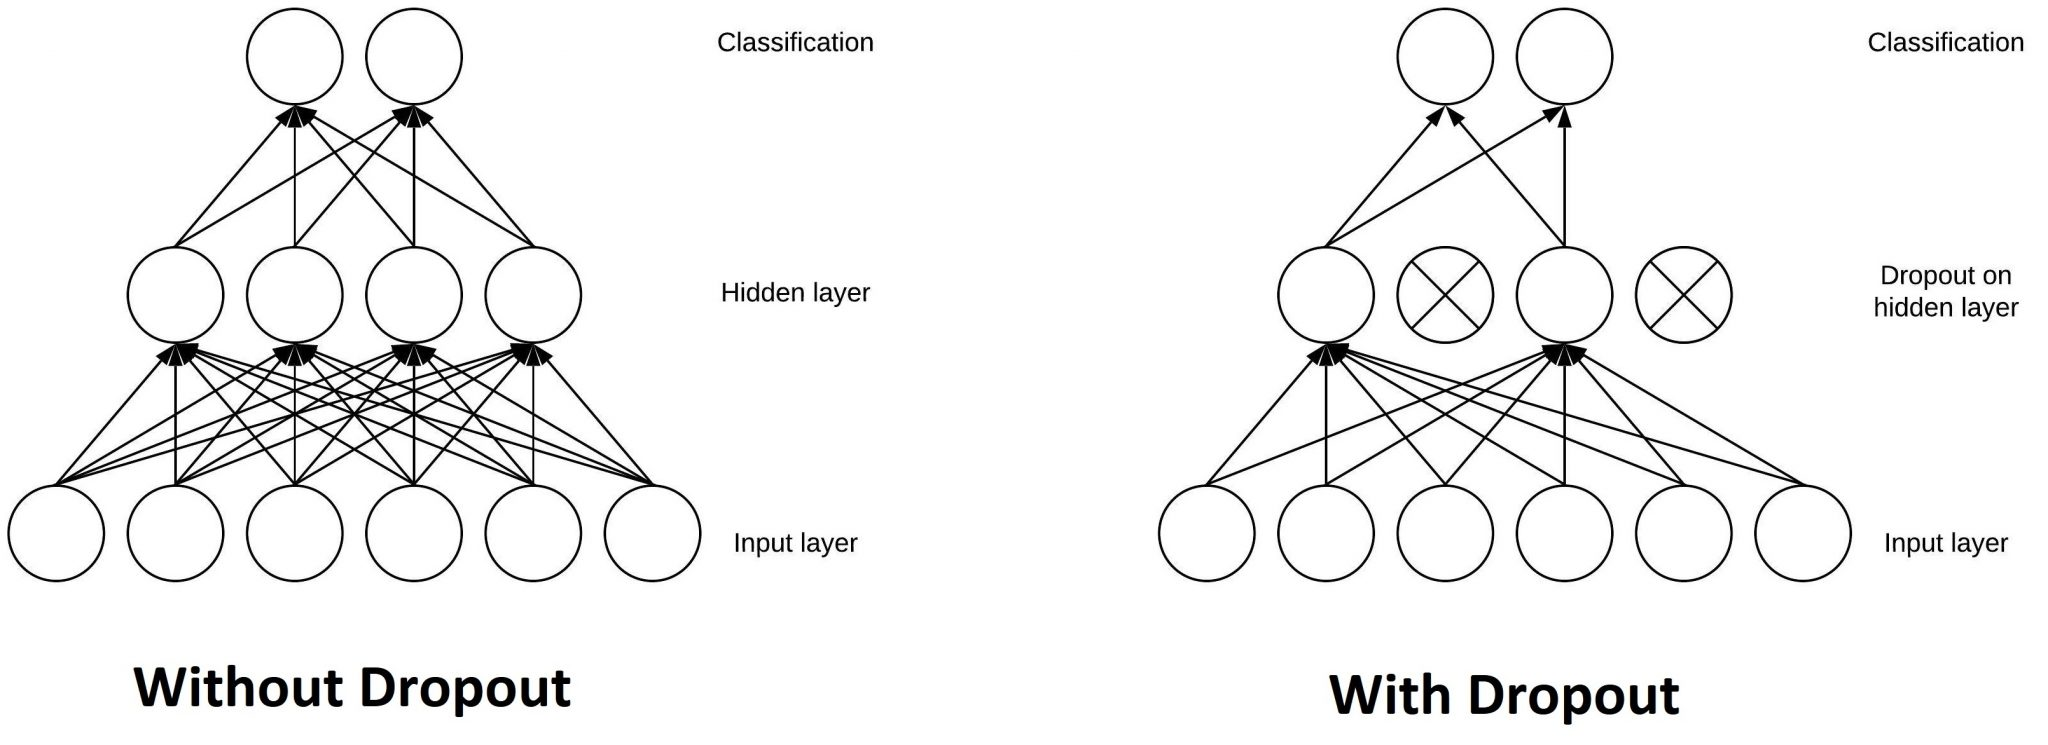

* **Flatten** is a layer in neural networks used to convert multidimensional data into a one-dimensional array. It collapses all dimensions except the batch dimension, allowing the data to be fed into a fully connected layer or other types of layers that require one-dimensional input. It's typically used to transition from convolutional layers to dense layers in image processing tasks.

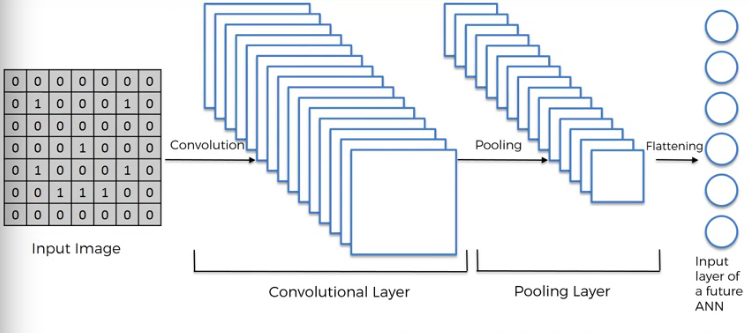

* **Dense**, also known as fully connected layer, is a fundamental layer type in neural networks where every neuron is connected to every neuron in the adjacent layers. It performs a linear operation on the input data followed by an activation function, enabling the network to learn complex patterns and relationships in the data. It's commonly used in classification and regression tasks.

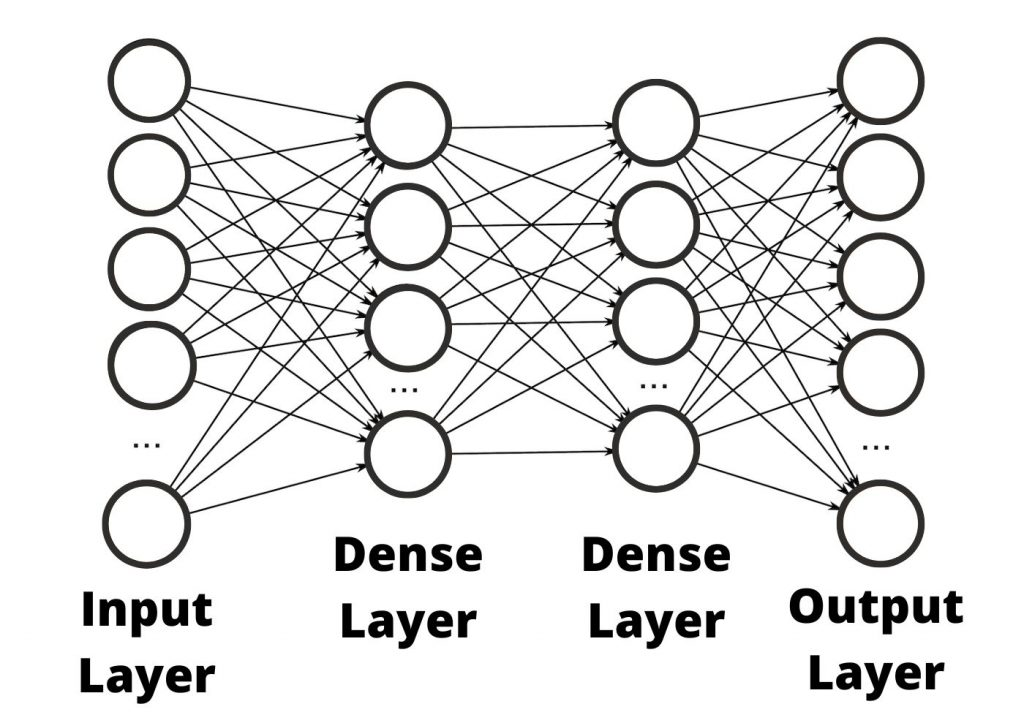


---



Finally, it trains the model on the training data with a validation split, storing the training history for evaluation and analysis.

It also dispalys the model name, number of epoches,and batch size.

Here in TensorFlow or Keras, the verbose parameter controls how the training progress is displayed during training.

* **verbose=0**: Silent mode. No output is displayed during training.
* **verbose=1**: Progress bar. Displays a progress bar showing the number of epochs completed.
* **verbose=2**: One line per epoch. Displays one line of output for each epoch, showing the epoch number and the training and validation metrics.

In [ ]:
# displaying the epochs, batch_size, verbose, model
print("model: ",model,"\nEpochs: ",EPOCHS,"\nBatch_Size: ",BATCH_SIZE,"\n\n")

# Train the model on the training data with validation split, storing training history
training_history = model.fit(xtrain, ytrain, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

model:  <keras.src.engine.sequential.Sequential object at 0x7834027e43a0> 
Epochs:  20 
Batch_Size:  1000 


Epoch 1/20
48/48 [==============================] - 7s 36ms/step - loss: 8.2972 - accuracy: 0.3962 - val_loss: 1.0109 - val_accuracy: 0.6513
Epoch 2/20
48/48 [==============================] - 1s 30ms/step - loss: 1.1882 - accuracy: 0.5737 - val_loss: 0.7237 - val_accuracy: 0.7423
Epoch 3/20
48/48 [==============================] - 1s 31ms/step - loss: 0.9312 - accuracy: 0.6562 - val_loss: 0.6129 - val_accuracy: 0.7781
Epoch 4/20
48/48 [==============================] - 2s 33ms/step - loss: 0.8061 - accuracy: 0.6963 - val_loss: 0.5379 - val_accuracy: 0.7997
Epoch 5/20
48/48 [==============================] - 2s 32ms/step - loss: 0.7299 - accuracy: 0.7249 - val_loss: 0.5104 - val_accuracy: 0.8088
Epoch 6/20
48/48 [==============================] - 1s 31ms/step - loss: 0.6756 - accuracy: 0.7461 - val_loss: 0.4844 - val_accuracy: 0.8223
Epoch 7/20
48/48 [===========================

The code creates a single figure with two subplots using Matplotlib's **subplots()** function.

The figure is divided into 1 row and 2 columns, allowing for side-by-side visualization.

In the left subplot, it plots the training and validation loss values against the number of epochs.

The title, axis labels, and legend are appropriately set to provide context.

Similarly, the right subplot visualizes the training and validation accuracy values over epochs, with proper labeling and legend placement.

This setup enables a comprehensive comparison of model performance in terms of loss and accuracy throughout the training process.

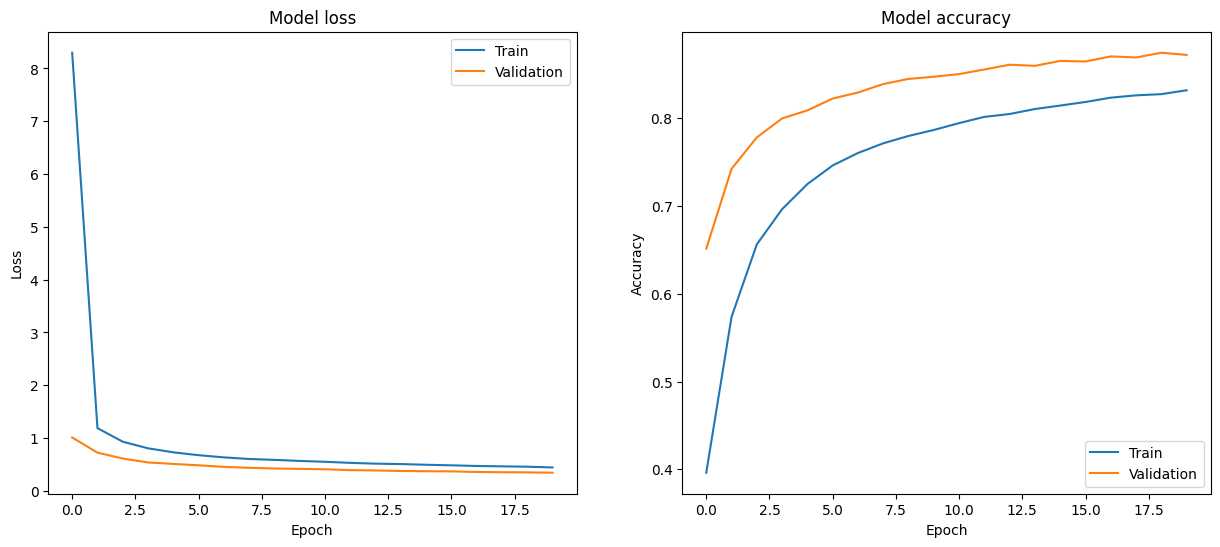

In [ ]:
# Create figure and axes objects
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot training & validation loss values
axes[0].plot(training_history.history['loss'])
axes[0].plot(training_history.history['val_loss'])
axes[0].set_title('Model loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
axes[1].plot(training_history.history['accuracy'])
axes[1].plot(training_history.history['val_accuracy'])
axes[1].set_title('Model accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='lower right')

plt.show()

# **Model Inference Section:**

This code evaluates a trained model on test data. It computes the loss and accuracy metrics for the test set. Then, it prints out the test loss and accuracy values. Finally, it visualizes these metrics using a bar chart, with 'Loss' and 'Accuracy' on the x-axis and their respective values on the y-axis.

Test Loss: 0.35657694935798645
Test Accuracy: 0.8672999739646912


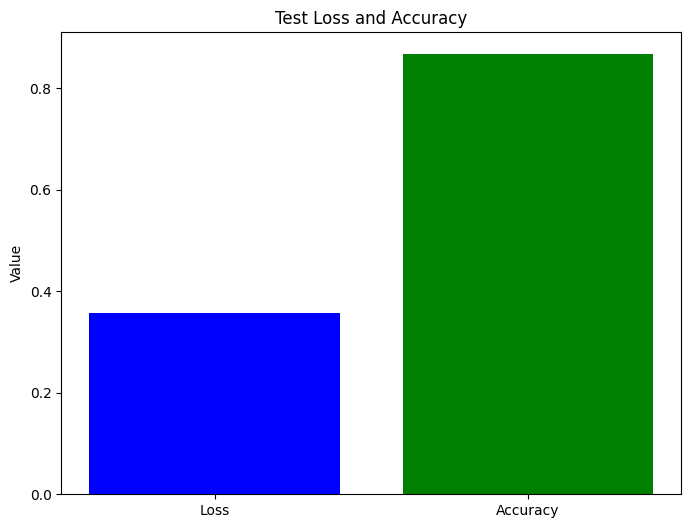

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(xtest, ytest, verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot the test loss and accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Loss', 'Accuracy'], [test_loss, test_accuracy], color=['blue', 'green'])
plt.title('Test Loss and Accuracy')
plt.ylabel('Value')
plt.show()


The code generates predictions (model_prediction) using the trained model on the test data (xtest).

It then plots a random sample of 15 test images along with their predicted labels and ground truth labels.

Each image is displayed with its corresponding predicted label and true label.

The title of each image reflects the predicted label in green if it matches the true label, otherwise in red.

313/313 [==============================] - 1s 2ms/step


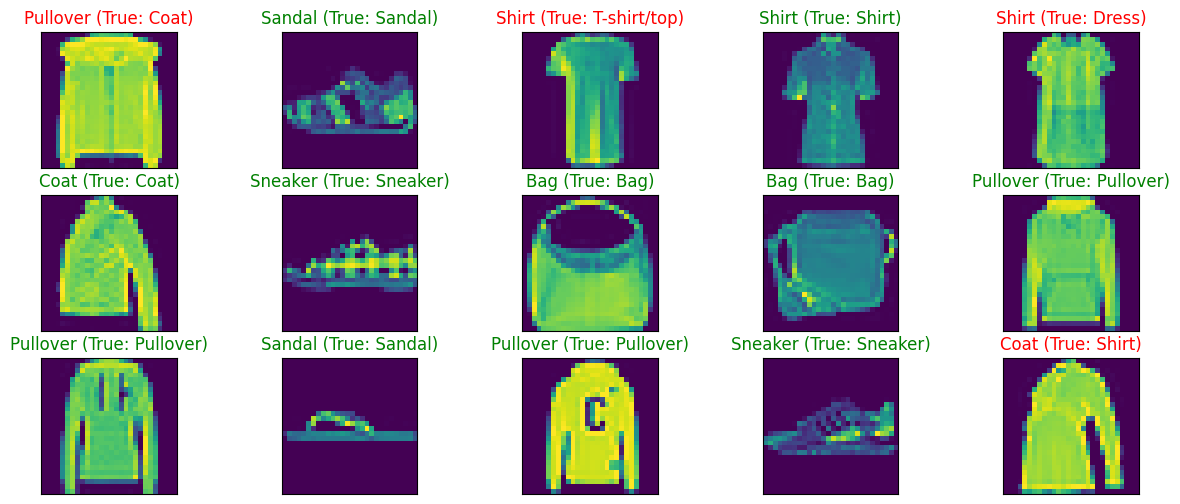

In [ ]:
# Generate predictions using the trained model on the test data
model_prediction = model.predict(xtest)

# Plot a random sample of 15 test images along with their predicted and true labels
figure = plt.figure(figsize=(15, 6))
for i, index in enumerate(np.random.choice(xtest.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(xtest[index]))
    predict_index = np.argmax(model_prediction[index])
    true_index = ytest[index]
    # Set the title for each image indicating predicted and true labels
    ax.set_title("{} (True: {})".format(fashion_mnist_labels[predict_index],
                                        fashion_mnist_labels[true_index]),
                                        color=("green" if predict_index == true_index else "red"))
plt.show()

The code generates raw predictions using the trained model on the test data.

It then extracts the predicted classes by finding the index of the maximum probability for each sample.

Finally, it computes the confusion matrix based on the true labels and predicted classes, and visualizes it using a heatmap.

313/313 [==============================] - 1s 2ms/step


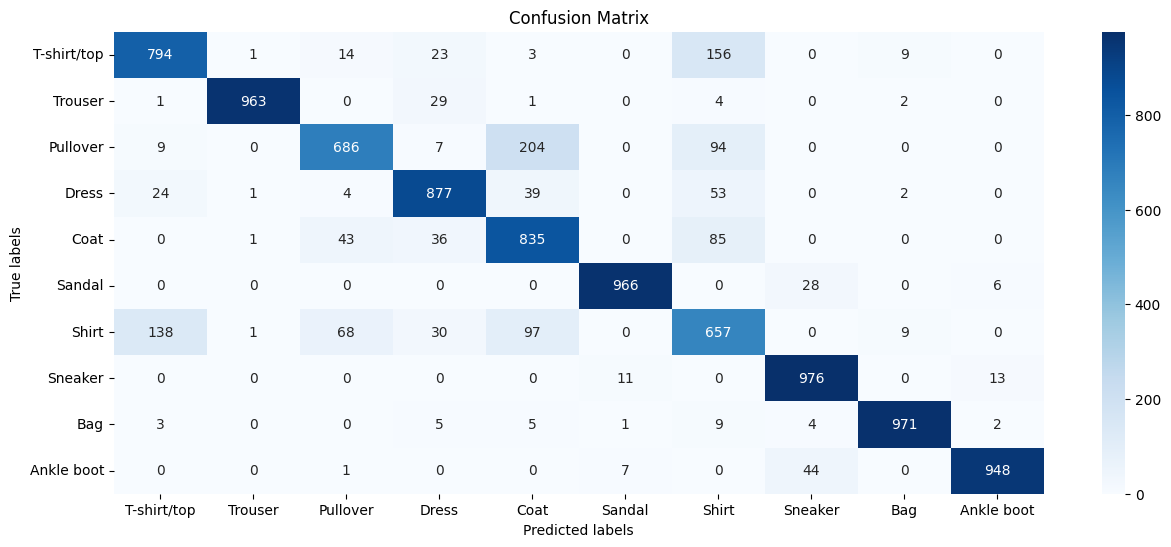

In [ ]:
# Generate raw predictions using the trained model on the test data
y_pred_probs = model.predict(xtest)

# Extract predicted classes by finding the index of the maximum probability for each sample
ypred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(15, 6))
sns.heatmap(conf_matrix, annot=True,
            fmt='g', cmap='Blues',
            xticklabels=fashion_mnist_labels,
            yticklabels=fashion_mnist_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
%cd /content

/content


In [ ]:
!wget https://raw.githubusercontent.com/AkanshaP2/test_files/main/shirt.jpeg

--2024-05-24 16:04:39--  https://raw.githubusercontent.com/AkanshaP2/test_files/main/shirt.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5893 (5.8K) [image/jpeg]
Saving to: ‘shirt.jpeg’

shirt.jpeg          100%[===================>]   5.75K  --.-KB/s    in 0s      

2024-05-24 16:04:40 (61.6 MB/s) - ‘shirt.jpeg’ saved [5893/5893]



In [ ]:
!ls

sample_data  shirt.jpeg


1/1 [==============================] - 0s 17ms/step


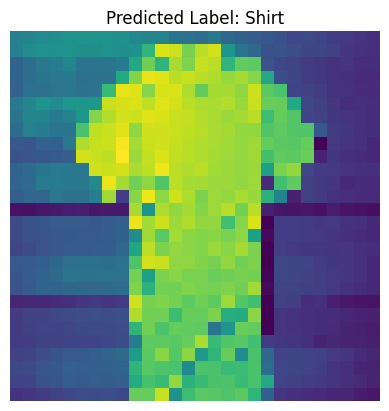

In [ ]:
from tensorflow.keras.preprocessing import image

# Path to the new image
new_image_path = '/content/shirt.jpeg'

# Load the new image
new_img = image.load_img(new_image_path, target_size=(28, 28), color_mode="grayscale")

# Convert the image to a numpy array
new_img_array = image.img_to_array(new_img)

# Reshape the image to match the input shape of the model
new_img_array = new_img_array.reshape(1, 28, 28, 1)

# Preprocess the image data
new_img_array = new_img_array.astype('float32') / 255

# Predict using the trained model
prediction = model.predict(new_img_array)

# Get the predicted label
predicted_index = np.argmax(prediction)

# Plot the new image
plt.imshow(new_img, cmap='gray')
plt.imshow(new_img)
plt.title(f'Predicted Label: {fashion_mnist_labels[predicted_index]}')
plt.axis('off')
plt.show()
